<a href="https://colab.research.google.com/github/BalramAgnihotri123/Machine-Learning-And-Deep-Learning-HandsOn/blob/main/pytorch1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
from torch import nn ## it contains all of torch's building blocks
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
print(torch.__version__)

1.12.1+cu113


### 1.Data:- Preparing and Loading

` Data can be of any form :-`
1. `images`
2. `voice/audio`
3. `vidoes`
4. `text`
  

In [28]:
weight = 0.9
bias = 0.5
start = 0.0
end = 1.0
step  =  0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

In [29]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

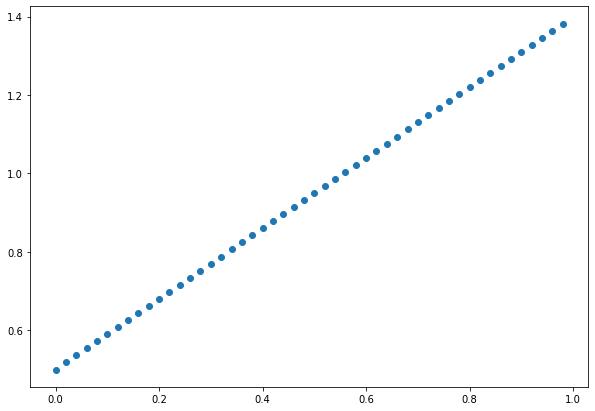

In [30]:
plt.figure(figsize =(10,7))
plt.scatter(X,y)

plt.show()

## 2. Initializing the model

In [31]:
# Creating a sub-class of nn.Module and defining the parameters i.e, weights and biases along with that we overwright the forward function.

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  
  def forward(self,x:torch.Tensor) -> torch.Tensor:
     return x*self.weights +self.bias

In [32]:
# create a random Seed
torch.manual_seed(42)

# create an instance of the sub-class we created
model_0 = LinearRegressionModel()

# Checking the Parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
#setting a loss function
loss_fn = torch.nn.L1Loss()

# setting up an optimizer
optimizer = torch.optim.SGD(params=list(model_0.parameters()), lr = 0.1)

## 3.Creating a training loop

In [35]:
train_loss_values = []
test_loss_values = []
epoch_count = []
epochs = 100
for epoch in range(epochs):
  # Training of the model
  model_0.train()
  y_pred = model_0(X_train) # forward
  loss = loss_fn(y_pred,y_train) # setting the loss function
  optimizer.zero_grad() # setting optimizer to zero grad i.e, 
  loss.backward() # backward propagation
  optimizer.step() # perfoming the optimization step
  
  # testing out our model
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test) # forward propagation
    test_loss = loss_fn(test_pred,y_test)
    if epoch%10 == 0:
      test_loss_values.append(test_loss)
      train_loss_values.append(loss)
      epoch_count.append(epoch)
      print(f"Epoch: {epoch} | loss: {loss} | Test_loss: {test_loss}" )

Epoch: 0 | loss: 0.6334112286567688 | Test_loss: 0.5750452280044556
Epoch: 10 | loss: 0.05418390780687332 | Test_loss: 0.03460393100976944
Epoch: 20 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134
Epoch: 30 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134
Epoch: 40 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134
Epoch: 50 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134
Epoch: 60 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134
Epoch: 70 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134
Epoch: 80 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134
Epoch: 90 | loss: 0.0230104960501194 | Test_loss: 0.10388197749853134


In [36]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8961], requires_grad=True), Parameter containing:
 tensor([0.4788], requires_grad=True)]

In [37]:
with torch.inference_mode():
  prediction = model_0(X_test)

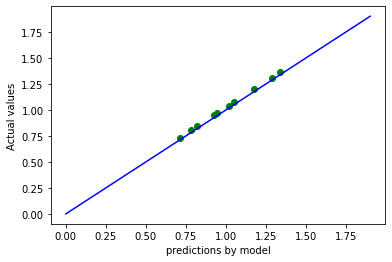

In [38]:
a = torch.arange(0,2,0.1)
plt.scatter(prediction,y_test,c='g')
plt.plot(a,a,c ='b')
plt.xlabel('predictions by model')
plt.ylabel('Actual values')
plt.show()

In [39]:
train_loss_values, test_loss_values, epoch_count

([tensor(0.6334, grad_fn=<L1LossBackward0>),
  tensor(0.0542, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>),
  tensor(0.0230, grad_fn=<L1LossBackward0>)],
 [tensor(0.5750),
  tensor(0.0346),
  tensor(0.1039),
  tensor(0.1039),
  tensor(0.1039),
  tensor(0.1039),
  tensor(0.1039),
  tensor(0.1039),
  tensor(0.1039),
  tensor(0.1039)],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [40]:
training_loss = torch.tensor(train_loss_values).numpy()
testing_loss = torch.tensor(test_loss_values).numpy()

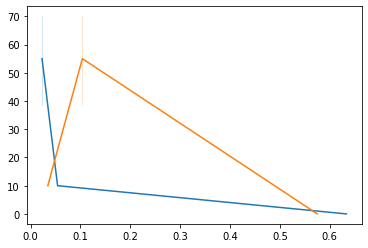

In [41]:
import seaborn as sns
sns.lineplot(x = training_loss,y = epoch_count)
sns.lineplot(x = testing_loss,y = epoch_count)

### `torch.save() is used to save a model in pickle format`
### `torch.load() is used to load a model in pickle format`
### `torch.nn.Module.load_state_dict() is used to load models state_dict`

In [43]:
import pickle
from pathlib import Path
PATH_NAME = Path('Models')
PATH_NAME.mkdir(parents = True,exist_ok = True)
MODEL_NAME = '01_Model_pytorch.pth'
MODEL_SAVE_PATH = PATH_NAME / MODEL_NAME
torch.save(model_0.state_dict(),f = MODEL_SAVE_PATH)
print(MODEL_SAVE_PATH)

Models/01_Model_pytorch.pth
